## EE 242 Lab 3a – Frequency Domain Representation of Signals - Fourier Series

**Henry Adams, Anna Petrbokova, Grace Hwang**

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, and matplotlib.pyplot.  

In [34]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib inline
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt

import scipy.io.wavfile as wav
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, we will learn how to build periodic signals from component sinusoids and how to transform signals from the time domain to the frequency domain. The concepts we’ll focus on include: implementation of the Fourier Series synthesis equation, using a discrete implementation of the Fourier Transform (DFT) with a digitized signal, and understanding the relationship between the discrete DFT index k and frequency
ω for both the original continuous signal x(t). This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 3a turn in checklist

•	Lab 3a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** 




## Assignment 1 -- Generating simple periodic signals

In the first assignment, you will develop an understanding of how some periodic signals are easier to approximate than others with a truncated Fourier Series. In this lab, we’ll work with real signals and use the synthesis equation:

$$x(t)=a_0+\sum_{k=1}^N2|a_k|cos(k\omega_0t+\angle a_k)$$

In lecture, you saw that you get ripples at transition points in approximating a square wave (**Gibbs phenomenon**). This happens for any signals with sharp edges. This assignment will involve approximating two signals (a sawtooth and a triangle wave) that have the same fundamental frequency (20Hz).

**A.** Write a function for generating a real-valued periodic time signal given the Fourier series coefficients [$a_0~a_1~···~a_N$], the sampling frequency, and the fundamental frequency. You may choose to have complex input coefficients or have separate magnitude and phase vectors for describing $a_k$.

**B.**  Define variables for the sampling frequency (8kHz) and the fundamental frequency (20Hz). Using this sampling frequency, create a time vector for a length of 200ms.

**C.**  The sawtooth signal has coefficients as follows:
$$a_0=0.5,a_k=1/(j2k\pi) $$
Using the function from part A, create three approximations of this signal with N = 2,5,20 and plot together in a 3×1 comparison.

**D.**  A triangle signal has coefficients:
$$a_0=0.5,a_k=\frac{2sin(k\pi/2)}{j(k\pi)^2}e^{-j2k\pi/2} $$
Create three approximations of this signal with N = 2,5,20 and plot together in a 3×1 comparison.


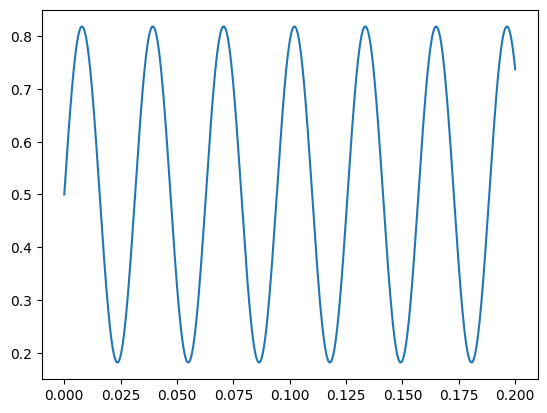

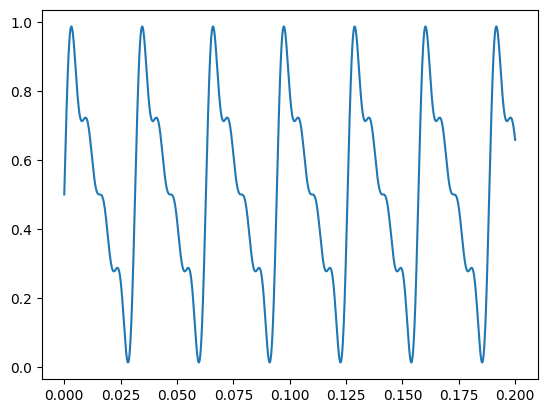

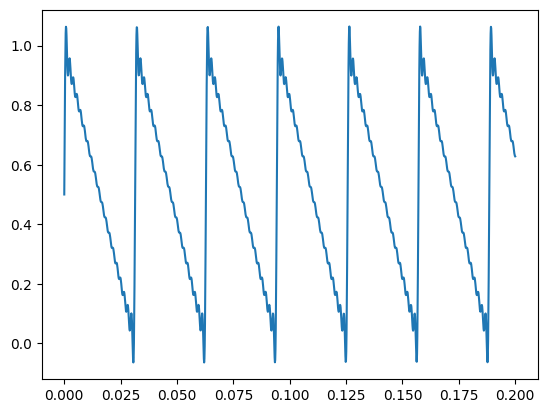

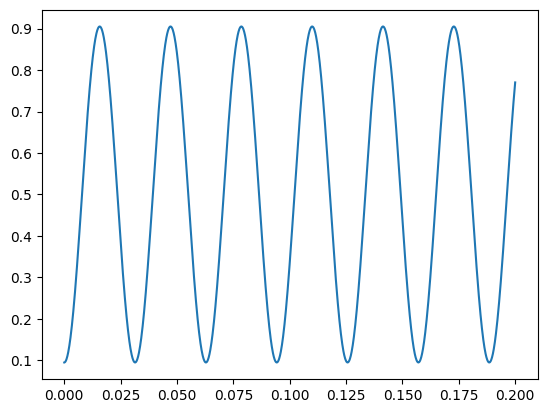

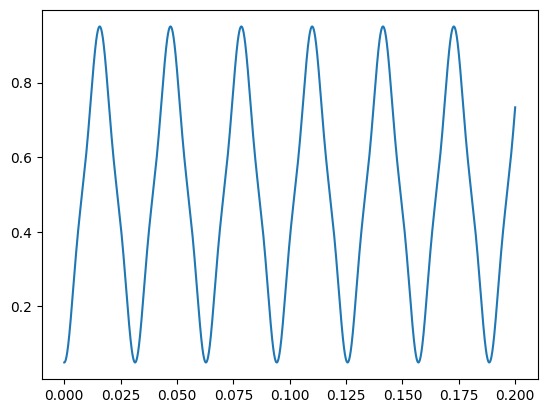

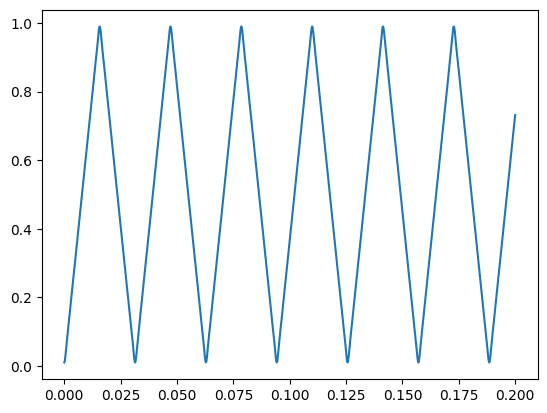

In [35]:
# Assignment 1 - Generating Periodic Signals with Fourier Series

# Part A - Writing a periodic signal generator function
# Input: t = time in seconds, fs = sampling rate, a = coefficients above, w = fundamental frequency
def fourier_series(t, fs,a,w):
    #Step 1 : Create an empty array x(t) with number of samples as t*fs
    x = np.zeros(int(t*fs))
    #Step 2 : Create a time vector t with number of samples as t*fs and each sample denoting the time
    t = np.linspace(0,t,int(t*fs))
    #Step 3.1 : For every coefficient from 0 to N (You may need to find N)
    angle = np.angle(a)
    abs = np.absolute(a)
    for i in range(len(a)):
        if i == 0:
            x += a[i]
        else:
            x += 2*abs[i]*np.cos(i*w*t + angle[i])
    #Step 3.2 :                create a cos signal with the right parameters
    #Step 3.3 :                add this signal to the x(t) NOTE HOW THE SAMPLES ARE SAME
    #Step 4 : Return the x(t)
    return t, x

# Part B - Initialize the parameters

fs = 8e3
w = 2e2
t=0.2

# Part C - Sawtooth Curve
a_2 = [0.5 if k == 0 else 1/(2*k*1j*np.pi) for k in range(2)]
a_5 = [0.5 if k == 0 else 1/(2*k*1j*np.pi) for k in range(5)]
a_20 = [0.5 if k == 0 else 1/(2*k*1j*np.pi) for k in range(20)]

# Use the function above to find the approximations 
time_vals_2, x_2 = fourier_series(t, fs, a_2, w)
time_vals_5, x_5 = fourier_series(t, fs, a_5, w)
time_vals_20, x_20 = fourier_series(t, fs, a_20, w)
# Plot the 3 approximations
plt.plot(time_vals_2, x_2)
plt.show()
plt.plot(time_vals_5, x_5)
plt.show()
plt.plot(time_vals_20, x_20)
plt.show()

# Part D - Triangle Curve
def tri_coef(k):
    sign = 1
    if k % 4 == 0 or k % 4 == 1:
        sign = -1
    value = 2*np.sin(k*np.pi / 2) / (k*np.pi)**2
    
    if k % 4 == 0 or k % 4 == 2:
        return complex(0, sign * value)
    else:
        return complex(sign*value, 0)
# Create a vector of a values as shown above for N = 2, 5, 20 
b_2 = [0.5 if k == 0 else tri_coef(k) for k in range(2)]
b_5 = [0.5 if k == 0 else tri_coef(k) for k in range(5)]
b_20 = [0.5 if k == 0 else tri_coef(k) for k in range(20)]
# Use the function above to find the approximations 
time_vals_2, y_2 = fourier_series(t, fs, b_2, w)
time_vals_5, y_5 = fourier_series(t, fs, b_5, w)
time_vals_20, y_20 = fourier_series(t, fs, b_20, w)
# Plot the 3 approximations
plt.plot(time_vals_2, y_2)
plt.show()
plt.plot(time_vals_5, y_5)
plt.show()
plt.plot(time_vals_20, y_20)
plt.show()


###  Discussion

You should have noticed that the second signal converges more quickly. Discuss the two reasons for this.

The first reason is that the sawtooth wave is discontinuous, and Gibbs phenomenon only occurs when there's some sort of discontinuity. [DO SECOND REASON]

## Assignment 2 -- Synthesizing a musical note

In this assignment, you will use the same synthesis equations to try to approximate a single note from a horn, which has the frequency characteristics illustrated below. Download the file horn11short.wav from the google drive to compare your synthesized version to the original.

Figure below shows the frequency component of a note played by a horn.
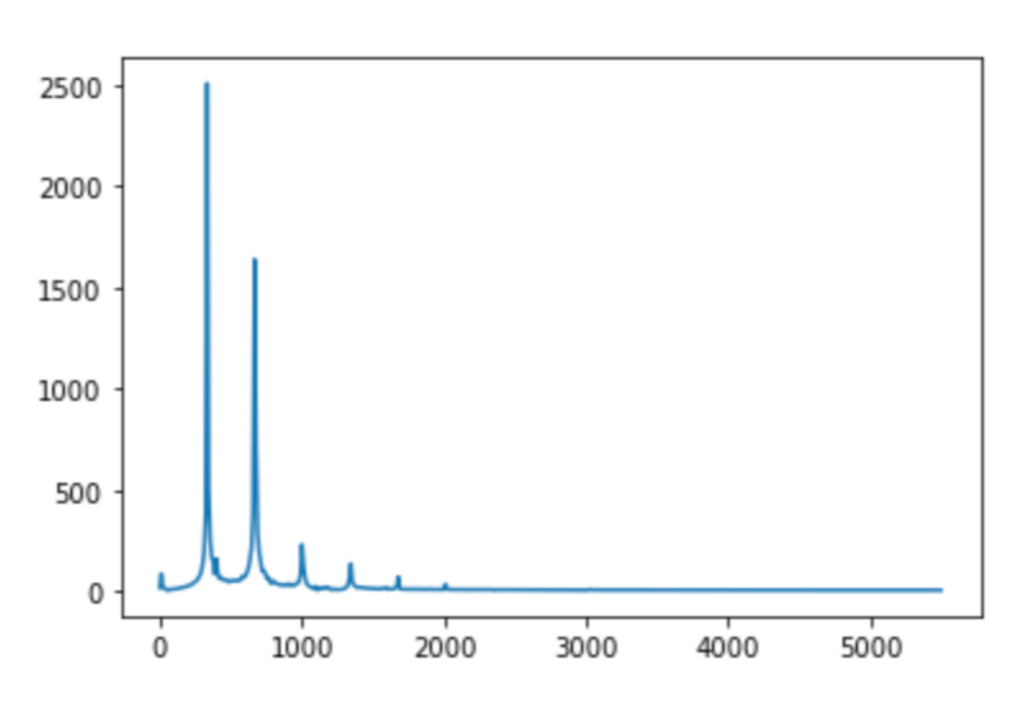

**A.**  Read in the horn signal, and use the sampling rate $f_s$ that you read in to create a time vector of length 100ms. Define the fundamental frequency to be $f_0$ = 335Hz. Create a signal that is a sinusoid at that frequency, and save it as a wav file.

**B.**  Create a vector (or two) to characterize $a_k$ using:

$$|a_k|:[2688,1900,316,178,78,38]$$

$$\angle a_k:[-1.73,-1.45,2.36,2.30,-2.30,1.13]$$

assuming $a_0=0$ and the first element of the vectors correspond to $a_1$. Use the function you created in part 1 to synthesize a signal, with $f_s$ and $f_0$ above, and save it as a wav file. Because the phase and magnitude are now hard coded, you may need to modify your function from above to apply here, so it is recommended that you copy and rename the function into another cell to make your debugging easier. 

**C.**  Plot the 100ms section of the original file starting at 200ms with a plot of the synthesized signal in a 2×1 plot.

**D.** Play the original file, the single tone, and the 6-tone approximation in series.



In [37]:
# Assignment 2 - Synthesizing a musical note

# Part A - Reading the signal and finding parameters
# Read the horn signal and find fs
fs, horn_signal = wav.read('horn11short.wav')

f0 = 335
# Define f0 (2piw) as 335 Hz 
# Create a signal that is just a sinewave at f0 over 100ms using the function created in Assignment 1
sine = fourier_series(0.1, fs, [0,1], 2*np.pi*f0)

# Part B - Initialize the parameters for your artificial curve.
a_mag = [0,2688,1900,316,178,78,38]
angle = [0,-1.73,-1.45,2.36,2.30,-2.30,1.13]

# Create the "a" vector using the parameters given above
a = [a_mag[k]*np.exp(1j*angle[k]) for k in range(6)]

# Use the function created in Assignment 1 to create the signal.
t_synthesized, synthesized_signal = fourier_series(0.1, fs, a, 2*np.pi*f0)

# Part C - Compare the artificial signal with original signal
# Find the part of the original signal between 200ms and 300ms 
# Plot this along with your artificial signal

start_time = 0.2
end_time = start_time + 0.1

start_sample = int(start_time * fs)
end_sample = int(end_time * fs)
og_section = horn_signal[start_sample:end_sample]
time_vector_og = np.linspace(start_time, end_time, len(og_section), endpoint=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.plot(time_vector_og, og_section)
ax1.title.set_text('Original Horn Signal')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.plot(t_synthesized, synthesized_signal)
ax2.title.set_text('Synthesized Horn Signal')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
plt.tight_layout()
plt.show()
# Part D - Make some noise
# Play the original part, sinewave and 6-tone approximations one by one in front of the TA
fs_og, og_signal = wav.read('horn11short.wav')
fs_single_tone, single_tone_signal = wav.read('sinusoid.wav')

fs, data = wav.read('horn11short.wav')
start_t =int(0.2 * fs)
end_t = int(0.3 * fs)
sample = data[start_t:end_t]
# Part D - Make some noise
# Play the original part, sinewave and 6-tone approximations one by one in front of the TA


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

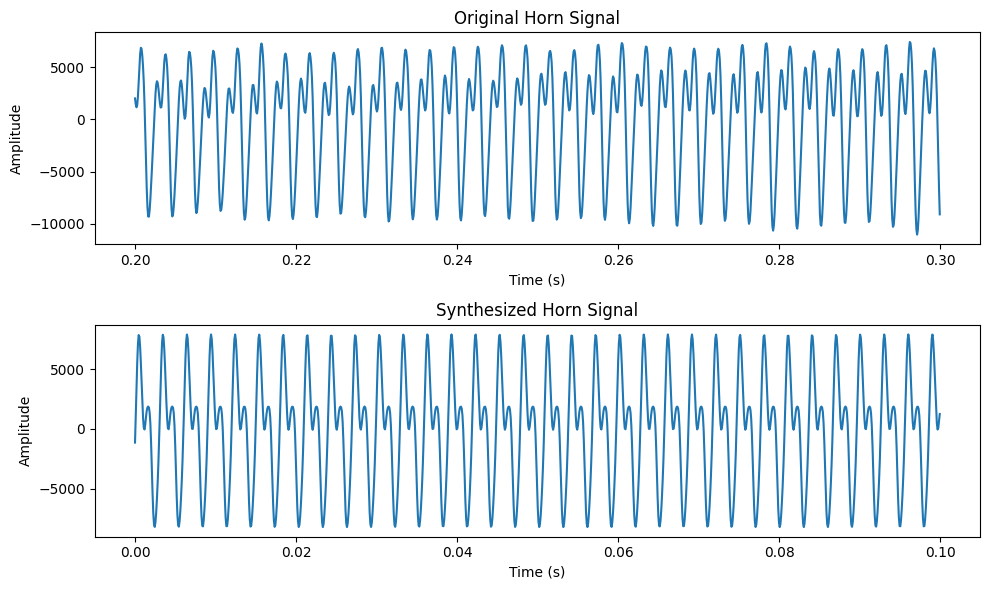

'sinusoid.wav'

NameError: name 'Audio' is not defined

In [ ]:
# Part A - Reading the signal and finding parameters
# Read the horn signal and find fs
# Define f0 (2piw) as 335 Hz
# Create a signal that is just a sinewave at f0 over 100ms using the function created in Assignment 1
fs, horn_signal = wav.read('horn11short.wav')
time_duration = 0.1 #100 ms
time_vector = np.linspace(0, time_duration, int(fs * time_duration), endpoint=False)
f0 = 335
sin_signal = np.sin(2 * np.pi * f0 * time_vector)
wav.write('sinusoid.wav', fs, sin_signal.astype(np.float32))
# Part B - Initialize the parameters for your artificial curve.
# Create the "a" vector using the parameters given above
# Use the function created in Assignment 1 to create the signal.

#fs = 44100
mag_ak = np.array([2688, 1900,316, 178, 78, 38])
phase_ak = np.array([-1.73, -1.45, 2.36, 2.30, -2.30, 1.13])
def synthesize_signal(t, fs, mag_ak, phase_ak, f0):
  signal = np.zeros_like(t, dtype=float)
  for k, (mag, phase) in enumerate(zip(mag_ak, phase_ak)):
    signal += 2 * mag * np.cos(2 * np.pi * (k+1) * f0 * t + phase) #skip a0
  return signal

time_vector = np.linspace(0, time_duration, int(fs * time_duration), endpoint=False)
synthesized_signal = synthesize_signal(time_vector, fs, mag_ak, phase_ak, f0)
wav.write('synthesized_horn.wav', fs, synthesized_signal.astype(np.float32))
# Part C - Compare the artificial signal with original signal
# Find the part of the original signal between 200ms and 300ms
# Plot this along with your artificial signal
start_time = 0.2
end_time = start_time + 0.1

start_sample = int(start_time * fs)
end_sample = int(end_time * fs)
og_section = horn_signal[start_sample:end_sample]
time_duration = 0.1
time_vector_og = np.linspace(start_time, end_time, len(og_section), endpoint=False)
time_vector_synthesized = np.linspace(0, time_duration, int(fs * time_duration), endpoint=False)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.plot(time_vector_og, og_section)
ax1.title.set_text('Original Horn Signal')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax2.plot(time_vector_synthesized, synthesized_signal)
ax2.title.set_text('Synthesized Horn Signal')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
plt.tight_layout()
plt.show()
# Part D - Make some noise
# Play the original part, sinewave and 6-tone approximations one by one in front of the TA
fs_og, og_signal = wav.read('horn11short.wav')
fs_single_tone, single_tone_signal = wav.read('sinusoid.wav')

fs, data = wav.read('horn11short.wav')
start_t =int(0.2 * fs)
end_t = int(0.3 * fs)
sample = data[start_t:end_t]

display('sinusoid.wav')
display(Audio(data='sinusoid.wav', rate=fs))
display('horn11short.wav')
#display(Audio(data='horn11short.wav', rate=fs))
display(Audio(data=sample, rate = fs))
display('synthesized_horn.wav')
display(Audio(data='synthesized_horn.wav', rate=fs))
fs_6_tone, six_tone_signal = wav.read('synthesized_horn.wav')


combined_signal = np.concatenate((horn_signal, single_tone_signal, six_tone_signal))
#display(Audio(data=combined_signal, rate=fs))

###  Discussion

The approximation does not sound quite like the original signal and the plot should
look pretty different. The difference in sound is in part due to multiple factors, including the truncated approximation, imperfect estimate of the parameters, and the fact that the original signal is not perfectly periodic. Try adjusting some parameters and determine what you think is the main source of distortion.